<a href="https://colab.research.google.com/github/SegunAdenaike/House-Price-Prediction/blob/main/AI_%26_DS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

### Data Exploration

In [ ]:
# Import the training and testing dataset

train_df = pd.read_csv("msc_training_dataset.csv")
test_df = pd.read_csv("msc_testing_dataset.csv")

In [ ]:
train_df.head()           # Visualize the training dataset

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
test_df.head()            # Visualize the test dataset

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [ ]:
train_df.info()           # Get some information about the training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [ ]:
test_df.info()          # Get some information about the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [ ]:
# Feature selection and defining the dependent variable

X_train = train_df.drop("price", axis = 1)
X_test = test_df.drop("price", axis = 1)
y_train = train_df["price"]
y_test = test_df["price"]

In [ ]:
X_train.head()          # Visualize the features dataset

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


In [ ]:
y_train                 # Visualize the target variable

0       6835
1       9005
2       9005
3       5105
4       9105
        ... 
2995    4825
2996    6755
2997    7565
2998    9135
2999    8955
Name: price, Length: 3000, dtype: int64

### Machine Learning
##### Linear regression, K Neighbor regression, Extreme Gradient Boost and Random Forest

In [ ]:
# Train the linear regression model with the training dataset

lr_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Use the model to predict on the test dataset

lr_pred = lr_reg.predict(X_test)

In [ ]:
# Quick view of the actual and predicted values

actual = []
for row in y_test:
  actual.append(row)
print("Actual values: ", actual[:5])
print("Predicted values: ", lr_pred[:5])

Actual values:  [5068, 7658, 11318, 8858, 11178]
Predicted values:  [ 5055.  7645. 11305.  8845. 11165.]


In [ ]:
# View the performance metrics of the model

train_score = lr_reg.score(X_train, y_train)
test_score = lr_reg.score(X_test, y_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"The mean absolute error is: {lr_mae}\nThe mean squared error is: {lr_mse}\nThe R2 score is: {lr_r2}")
print("Training score: ", train_score, "\n""Test score: ", test_score)

The mean absolute error is: 13.000000000000469
The mean squared error is: 169.00000000001216
The R2 score is: 0.9999656095212318
Training score:  1.0 
Test score:  0.9999656095212318


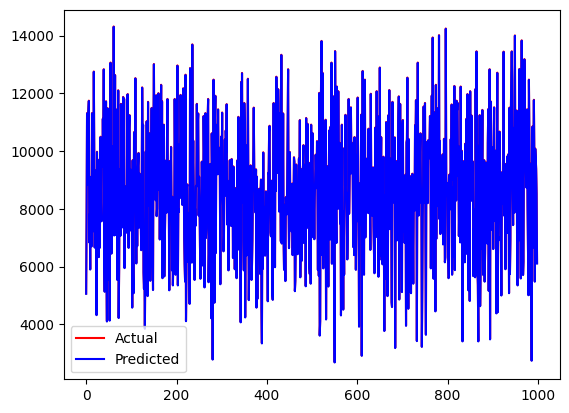

In [ ]:
# Plot the predicted and actual values to visualize the model's accuracy

plt.plot(y_test, color='red', label='Actual')
plt.plot(lr_pred, color='blue', label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Train the random forest model

rf_reg = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
# Use the random forest model to predict on the test dataset

rf_pred = rf_reg.predict(X_test)

In [ ]:
# Quick view of the actual and predicted values

print(actual[:5])
print(rf_pred[:5])

[5068, 7658, 11318, 8858, 11178]
[ 5274.7  7728.4 11397.7  8752.5 11072.9]


In [ ]:
# View the performance metrics of the model

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"The mean absolute error is: {rf_mae}\nThe R2 score is: {rf_r2}\nThe mean squared error is: {rf_mse}")

The mean absolute error is: 172.68558558558556
The R2 score is: 0.9894313077380442
The mean squared error is: 51936.147917917915


In [ ]:
# Train the k neighbor regressor model

knn_reg = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
# Use the k neighbor regressor model to predict on the test dataset

knn_pred = knn_reg.predict(X_test)

In [ ]:
# Quick view of the actual and predicted values

print(actual[:5])
print(knn_pred[:5])

[5068, 7658, 11318, 8858, 11178]
[ 6191.  7519. 10567.  8857. 10787.]


In [ ]:
# View the performance metrics of the model

knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)

print(f"The mean absolute error is: {knn_mae}\nThe R2 score is: {knn_r2}\nThe mean squared error is: {knn_mse}")

The mean absolute error is: 457.2002002002002
The R2 score is: 0.9330254823581632
The mean squared error is: 329122.88188188185


In [ ]:
# Train the extreme gradient boost regressor model, using grid search to improve its performance

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# define hyperparameters to tune
parameters = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

# perform grid search with cross-validation
grid_search = GridSearchCV(xgb_reg, parameters, cv=5)
grid_search.fit(X_train, y_train)

# get best hyperparameters
best_params = grid_search.best_params_

print(best_params)

# create XGBoost regressor with best hyperparameters
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)

# fit the model on the training data
best_xgb_model.fit(X_train, y_train)

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# Use the xgb regressor model to predict on the test dataset

xgb_pred = best_xgb_model.predict(X_test)

In [ ]:
# Quick view of the actual and predicted values

print(actual[:5])
print(xgb_pred[:5])

[5068, 7658, 11318, 8858, 11178]
[ 5089.2026  7668.7017 11258.209   8780.527  11163.42  ]


In [ ]:
# View the performance metrics of the model

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

print(f"The mean absolute error is: {xgb_mae}\nThe R2 score is: {xgb_r2}\nThe mean squared error is: {xgb_mse}")

The mean absolute error is: 33.84649713189752
The R2 score is: 0.9996203985896139
The mean squared error is: 1865.4185883178486


### Model Selection
##### The best model will be selected based on performance

In [ ]:
# Performance metrics for the models
r2_score = [('Linear Regression', lr_r2), ('Random Forest', rf_r2), ('K Neighbor', knn_r2), ('XGBoost', xgb_r2)]
mse = [("Linear Regression", lr_mse), ("Random Forest", rf_mse), ("K Neighbor", knn_mse), ("XGBoost", xgb_mse)]
mae = [("Linear Regression", lr_mae), ("Random Forest", rf_mae), ("K Neighbor", knn_mae), ("XGBoost", xgb_mae)]

# Sort the performance metrics
r2_score.sort(key=lambda x: x[1], reverse=True)
mse.sort(key=lambda x: x[1])
mae.sort(key=lambda x: x[1])

print("R2 Score: ", r2_score, '\n', "Mean Squared Error: ", mse, '\n', "Mean Absolute Error: ", mae)

R2 Score:  [('Linear Regression', 0.9999656095212318), ('XGBoost', 0.9996203985896139), ('Random Forest', 0.9894313077380442), ('K Neighbor', 0.9330254823581632)] 
 Mean Squared Error:  [('Linear Regression', 169.00000000001216), ('XGBoost', 1865.4185883178486), ('Random Forest', 51936.147917917915), ('K Neighbor', 329122.88188188185)] 
 Mean Absolute Error:  [('Linear Regression', 13.000000000000469), ('XGBoost', 33.84649713189752), ('Random Forest', 172.68558558558556), ('K Neighbor', 457.2002002002002)]


### Feature Importance for Selected Model (Linear Regression)
##### Linear regression performed better than other models with the highest R2 score and the lowest MSE and MAE

In [ ]:
# Create a dataframe consisting feature and their regression coefficients

features = pd.DataFrame(lr_reg.coef_, X_train.columns, columns=["coefficients"])
features

,coefficients
room,1000.0
bathroom,300.0
kitchen,500.0
french_door,240.0
backyard,560.0
furnished,2000.0
green_paint,370.0
solar_power,1530.0
woodfloor,1890.0
qlm_security,440.0


In [ ]:
# Calculate the standard deviation for each feature

st_devs = []
for column in X_train.columns:
  st_dev = train_df[column].std()
  st_devs.append(st_dev)

features["st_dev"] = np.array(st_devs).reshape(-1, 1)       # Add the standard deviation values to the features dataframe

In [ ]:
# Calculate the importance of each feature by multiplying its regression coefficient with its standard deviation

features["importance"] = features["coefficients"] * features["st_dev"]
features["normalized_importance"] = 100 * features["importance"] / features["importance"].max()         # Normalize the importances
features

,coefficients,st_dev,importance,normalized_importance
room,1000.0,1.424281,1424.280939,100.000000
bathroom,300.0,0.499962,149.988696,10.530836
kitchen,500.0,0.499599,249.799519,17.538641
french_door,240.0,0.813153,195.156694,13.702121
backyard,560.0,0.499990,279.994336,19.658645
furnished,2000.0,0.499955,999.909744,70.204530
green_paint,370.0,0.499858,184.947558,12.985328
solar_power,1530.0,0.500065,765.098797,53.718250
woodfloor,1890.0,0.499931,944.869958,66.340139
qlm_security,440.0,0.499709,219.872125,15.437413


In [ ]:
# Sort the features according to importance

features = features.sort_values("normalized_importance")
features

,coefficients,st_dev,importance,normalized_importance
bathroom,300.0,0.499962,149.988696,10.530836
green_paint,370.0,0.499858,184.947558,12.985328
french_door,240.0,0.813153,195.156694,13.702121
qlm_security,440.0,0.499709,219.872125,15.437413
kitchen,500.0,0.499599,249.799519,17.538641
backyard,560.0,0.499990,279.994336,19.658645
club_access,730.0,0.500083,365.060767,25.631233
solar_power,1530.0,0.500065,765.098797,53.718250
woodfloor,1890.0,0.499931,944.869958,66.340139
furnished,2000.0,0.499955,999.909744,70.204530


<BarContainer object of 11 artists>

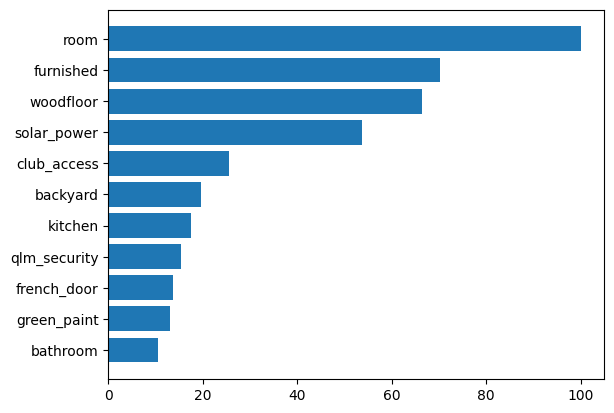

In [ ]:
# Plot the feature importance

plt.barh(features.index, features["normalized_importance"])

In [ ]:
test_df["price_prediction"] = np.array(lr_pred).reshape(-1, 1)

In [ ]:
test_df.head(20)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price,price_prediction
0,1,1,1,3,0,0,1,1,0,1,0,5068,5055.0
1,5,1,1,2,0,0,0,0,0,1,1,7658,7645.0
2,5,1,1,3,0,0,0,1,1,1,1,11318,11305.0
3,4,2,2,1,0,1,1,0,0,1,0,8858,8845.0
4,5,2,1,1,0,1,1,1,0,0,1,11178,11165.0
5,5,1,1,2,1,1,1,1,0,1,0,11388,11375.0
6,5,1,2,3,0,0,1,1,1,0,1,11748,11735.0
7,2,1,2,1,0,1,1,0,0,0,1,6848,6835.0
8,2,1,1,3,1,1,1,0,0,1,1,7828,7815.0
9,1,1,1,3,1,0,0,0,1,0,1,5908,5895.0


In [ ]:
test_df.to_excel('predicted_values.xlsx', index=False)

In [ ]:
test_df.shape

(999, 13)